# Extract Job Posts from Indeed


In [81]:
import pandas
import configparser
import psycopg2

In [82]:
config = configparser.ConfigParser()
config.read('config.ini')

host = config['myaws']['host']
db = config['myaws']['db']
user = config['myaws']['user']
pwd = config['myaws']['pwd']

In [83]:
conn = psycopg2.connect(host = host,
                       user = user,
                        password = pwd,
                        dbname = db
                       )
cur = conn.cursor()

In [84]:
# replace the schema and table name to your schema and table name
table_sql = """
            CREATE TABLE IF NOT EXISTS gp31.indeed
            (
                id SERIAL,
                job_title VARCHAR(200),
                job_company VARCHAR(200),
                job_loc VARCHAR(200),
                job_salary VARCHAR(200),
                job_summary TEXT,
                PRIMARY KEY(id)
            );

            """

In [85]:
cur.execute(table_sql)

conn.commit()

# Request HTML

In [86]:
url = 'https://www.indeed.com/jobs?q=intelligence+analyst&start=2'

In [87]:
import urllib.request
response = urllib.request.urlopen(url)
html_data= response.read()

# Parese HTML

In [88]:
!pip install beautifulsoup4

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [89]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html_data,'html.parser')
print(soup)

<!DOCTYPE html>

<html dir="ltr" lang="en">
<head>
<meta content="text/html;charset=utf-8" http-equiv="content-type"/>
<script src="//d1ewxbznfa539k.cloudfront.net/s/d325a38/en_US.js" type="text/javascript"></script>
<link href="//d1ewxbznfa539k.cloudfront.net/s/b45d10b/jobsearch_all.css" rel="stylesheet" type="text/css"/>
<link href="https://rss.indeed.com/rss?q=intelligence+analyst" rel="alternate" title="Intelligence Analyst Jobs, Employment" type="application/rss+xml"/>
<link href="/m/jobs?q=intelligence+analyst" media="only screen and (max-width: 640px)" rel="alternate"/>
<link href="/m/jobs?q=intelligence+analyst" media="handheld" rel="alternate"/>
<script type="text/javascript">

if (typeof window['closureReadyCallbacks'] == 'undefined') {
window['closureReadyCallbacks'] = [];
}

function call_when_jsall_loaded(cb) {
if (window['closureReady']) {
cb();
} else {
window['closureReadyCallbacks'].push(cb);
}
}
</script>
<meta content="1" name="ppstriptst"/>
<script>
var _scriptDownl

In [90]:
for table_resultsBody in soup.find_all('table', id = 'resultsBody'):
    pass
print(table_resultsBody)

<table border="0" cellpadding="0" cellspacing="0" class="centered" id="resultsBody" role="presentation"><tbody id="resultsBodyContent"><tr><td>
<script type="text/javascript">
    window['ree'] = "pdsssps";
    window['jas'] = "u46S2kTA0";
</script>
<style type="text/css">
    .basePromo{margin-top:8px;margin-bottom:13px;padding-left:12px;padding-right:12px}.redText{color:red}.bold{font-weight:bold}.basePromo.resume{font-size:14px;margin-top:5px}.basePromo.resume>img{height:20px;margin-right:5px;margin-bottom:3px;width:16px}</style>
<link href="//d1ewxbznfa539k.cloudfront.net/s/8a1695b/jasx-serp2pane.css" rel="stylesheet" type="text/css">
<link href="//d1ewxbznfa539k.cloudfront.net/s/9d443bb/NavigableContainer.css" rel="stylesheet" type="text/css">
<link href="//d1ewxbznfa539k.cloudfront.net/s/8f746c7/JobResult.css" rel="stylesheet" type="text/css">
<table border="0" cellpadding="0" cellspacing="0" class="serpContainerMinHeight" id="pageContent" role="presentation" width="100%">
<tr ro

In [91]:
for table_pageContent in table_resultsBody.find_all('table', id = 'pageContent'):
    pass
print(table_pageContent)

<table border="0" cellpadding="0" cellspacing="0" class="serpContainerMinHeight" id="pageContent" role="presentation" width="100%">
<tr role="main" valign="top">
<style type="text/css">
        .searchCount-a11y-contrast-color,.currentSearchLabel-a11y-contrast-color,.sortByLabel-a11y-contrast-color{color:#6f6f6f !important}.jobAlertFormLabel-a11y-contrast-color{color:#6f6f6f}</style>
<style type="text/css">
      .accessible-contrast-color-location{color:#2d2d2d !important}</style>
<td id="resultsCol">
<div id="resultsColTopSpace"></div>
<div class="messageContainer">
<script type="text/javascript">
      function setRefineByCookie(refineByTypes) {
        var expires = new Date();
        expires.setTime(expires.getTime() + (10 * 1000));
        for (var i = 0; i < refineByTypes.length; i++) {
          setCookie(refineByTypes[i], "1", expires);
        }
      }
    </script>
</div>
<style type="text/css">
    #increased_radius_result {
        font-size: 16px;
        font-style: it

In [92]:
for td_resultsCol in table_pageContent.find_all('td', id = 'resultsCol'):
    pass
print(td_resultsCol)

<td id="resultsCol">
<div id="resultsColTopSpace"></div>
<div class="messageContainer">
<script type="text/javascript">
      function setRefineByCookie(refineByTypes) {
        var expires = new Date();
        expires.setTime(expires.getTime() + (10 * 1000));
        for (var i = 0; i < refineByTypes.length; i++) {
          setCookie(refineByTypes[i], "1", expires);
        }
      }
    </script>
</div>
<style type="text/css">
    #increased_radius_result {
        font-size: 16px;
        font-style: italic;
    }
    #original_radius_result{
        font-size: 13px;
        font-style: italic;
        color: #666666;
    }
</style>
<div class="resultsTop"><div class="mosaic-zone" id="mosaic-zone-aboveJobCards"><div class="mosaic mosaic-provider-serpreportjob" id="mosaic-provider-serpreportjob"><span><div class="mosaic-reportcontent-content"></div></span></div></div><script type="text/javascript">
                try {
                    window.mosaic.onMosaicApiReady(function() 

# Save Data to Database

In [93]:
#  identify the job title, company, ratings, reviews, salary, and summary
for div_row in td_resultsCol.find_all('div', class_='jobsearch-SerpJobCard unifiedRow row result'):

    # find job title
    job_title = None
    job_company  = None
    job_rating = None
    job_loc = None
    job_salary = None
    job_summary = None
    for h2_title in div_row.find_all('h2', class_ = 'title'):
       
        job_title = h2_title.a.text.strip().replace("'","_")
   
    for div_dsc in div_row.find_all('div', class_ = 'sjcl'):
        
        #find company name
        for span_company in div_dsc.find_all('span', class_ = 'company'):
            job_company = span_company.text.strip().replace("'","_")
        
        # find location
        for div_loc in div_dsc.find_all('div', class_ = 'location accessible-contrast-color-location'):
            job_loc = div_loc.text.strip().replace("'","_")
    
    # find salary
    for div_salary in div_row.find_all('div',class_ ='salarySnippet'):
        job_salary = div_salary.text.strip().replace("'","_")
    
    #find summary
    for div_summary in div_row.find_all('div', class_ = 'summary'):
        job_summary = div_summary.text.strip().replace("'","_")
        
    # insert into database
    
    sql_insert = """
                insert into gp31.indeed(job_title,job_company,job_loc,job_salary,job_summary)
                values('{}','{}','{}','{}','{}')            
                """.format(job_title,job_company,job_loc,job_salary,job_summary)

cur.execute(sql_insert)
conn.commit()

# View the Table

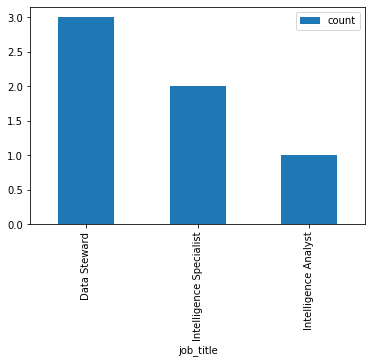

In [96]:
df = pandas.read_sql_query('select count(*) as count,job_title from gp31.indeed group by job_title order by count desc ', conn)
df.plot.bar(x='job_title')

In [97]:
cur.close()
conn.close()